# Impact of income and population density on exam grades

* This is an exercise in data cleaning, joining and regression analysis. We will be investigating average exam grades. 
* You get only 2-3 hours to work on this, so you should definitely leave out time consuming nice-to-haves and spend max. 10 minutes per question. 
* Work together with someone, compare your results, and ask someone to help if you're stuck. 


_There are methodological problems here. Note them for later discussion, but please bear with the exercise :). _

_Datasets are in Dutch, so if you don't speak Dutch, it's an additional challenge..._

## Overall objective

* Based on [this](https://data.overheid.nl/data/dataset/vo-geslaagden--gezakten-en-gemiddelde-examencijfers-per-instelling---ministerie-van-ocw) and https://nl.wikipedia.org/wiki/Tabel_van_Nederlandse_gemeenten, formulate an answer to the following question

> Do population density, province, income, and/or profile choice influence exam grades, and if so, how? 

In [2]:
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


* Download [this](https://data.overheid.nl/data/dataset/vo-geslaagden--gezakten-en-gemiddelde-examencijfers-per-instelling---ministerie-van-ocw) dataset and load it as a `pd.DataFrame`. 
* Check the datatypes and fix problems that you see coming up regarding the objective here. 

In [6]:
ex = pd.read_excel("../project/data/07.-geslaagden,-gezakten-en-cijfers-2015-2016.xlsx")
ex.head()

BRIN NUMMER VESTIGINGSNUMMER   INSTELLINGSNAAM VESTIGING  \
0        00AH           00AH00  Opb SGM t Stedelijk Lyceum   
1        00AH           00AH00  Opb SGM t Stedelijk Lyceum   
2        00AH           00AH00  Opb SGM t Stedelijk Lyceum   
3        00AH           00AH00  Opb SGM t Stedelijk Lyceum   
4        00AH           00AH00  Opb SGM t Stedelijk Lyceum   

  GEMEENTENAAM VESTIGING PROVINCIE VESTIGING ONDERWIJSTYPE VO LEERWEG VMBO  \
0               ENSCHEDE          Overijssel             HAVO          NaN   
1               ENSCHEDE          Overijssel             HAVO          NaN   
2               ENSCHEDE          Overijssel             HAVO          NaN   
3               ENSCHEDE          Overijssel             HAVO          NaN   
4               ENSCHEDE          Overijssel             HAVO          NaN   

  VMBO SECTOR                                           AFDELING  \
0         NaN                            Cultuur en Maatschappij   
1         NaN                           Economie en Maatschappij   
2         NaN  Economie en Maatschappij / Cultuur en Maatscha...   
3         NaN                               Natuur en Gezondheid   
4         NaN                                 Natuur en Techniek   

   EXAMENKANDIDATEN  GESLAAGDEN  GEZAKTEN  GEMIDDELD CIJFER SCHOOLEXAMEN  \
0                14          13         1                            6.4   
1                34          32         2                            6.1   
2                 4           4         0                            6.8   
3                24          23         1                            6.3   
4                 6           5         1                            6.2   

   GEMIDDELD CIJFER CENTRAAL EXAMEN  GEMIDDELD CIJFER CIJFERLIJST  
0                               6.2                           6.5  
1                               6.3                           6.3  
2                               6.9                           7.0  
3                               6.3                           6.4  
4                               6.5                           6.4

In [7]:
ex.dtypes

BRIN NUMMER                          object
VESTIGINGSNUMMER                     object
INSTELLINGSNAAM VESTIGING            object
GEMEENTENAAM VESTIGING               object
PROVINCIE VESTIGING                  object
ONDERWIJSTYPE VO                     object
LEERWEG VMBO                         object
VMBO SECTOR                          object
AFDELING                             object
EXAMENKANDIDATEN                      int64
GESLAAGDEN                            int64
GEZAKTEN                              int64
GEMIDDELD CIJFER SCHOOLEXAMEN       float64
GEMIDDELD CIJFER CENTRAAL EXAMEN    float64
GEMIDDELD CIJFER CIJFERLIJST        float64
dtype: object

* Calculate the average grade per profile (afdeling) and per municipality (gemeente). Include only grades for HAVO (`onderwijstype == "HAVO"`).

In [16]:
## naive, not weighting

grades = ex[ex["ONDERWIJSTYPE VO"] == "HAVO"].groupby(
    ("AFDELING", "GEMEENTENAAM VESTIGING")
)["GEMIDDELD CIJFER CENTRAAL EXAMEN"].apply(np.mean).reset_index()

grades.head(50).tail(10)

AFDELING GEMEENTENAAM VESTIGING  \
40  Cultuur en Maatschappij                 DONGEN   
41  Cultuur en Maatschappij            DONGERADEEL   
42  Cultuur en Maatschappij              DORDRECHT   
43  Cultuur en Maatschappij                DRONTEN   
44  Cultuur en Maatschappij                 DRUTEN   
45  Cultuur en Maatschappij                 DUIVEN   
46  Cultuur en Maatschappij          ECHT-SUSTEREN   
47  Cultuur en Maatschappij          EDAM-VOLENDAM   
48  Cultuur en Maatschappij                    EDE   
49  Cultuur en Maatschappij               EEMSMOND   

    GEMIDDELD CIJFER CENTRAAL EXAMEN  
40                               6.4  
41                               6.8  
42                               6.1  
43                               6.4  
44                               5.9  
45                               6.6  
46                               6.2  
47                               6.3  
48                               6.0  
49                               6.1

In [17]:
## with weighting

grades = ex[ex["ONDERWIJSTYPE VO"] == "HAVO"].groupby(
    ("AFDELING", "GEMEENTENAAM VESTIGING")
).apply(lambda x: np.average(x["GEMIDDELD CIJFER CENTRAAL EXAMEN"], weights = x["EXAMENKANDIDATEN"])).rename(
    "GEMIDDELD CIJFER CENTRAAL EXAMEN"
).reset_index()

grades.head(50).tail(10)

AFDELING GEMEENTENAAM VESTIGING  \
40  Cultuur en Maatschappij                 DONGEN   
41  Cultuur en Maatschappij            DONGERADEEL   
42  Cultuur en Maatschappij              DORDRECHT   
43  Cultuur en Maatschappij                DRONTEN   
44  Cultuur en Maatschappij                 DRUTEN   
45  Cultuur en Maatschappij                 DUIVEN   
46  Cultuur en Maatschappij          ECHT-SUSTEREN   
47  Cultuur en Maatschappij          EDAM-VOLENDAM   
48  Cultuur en Maatschappij                    EDE   
49  Cultuur en Maatschappij               EEMSMOND   

    GEMIDDELD CIJFER CENTRAAL EXAMEN  
40                          6.400000  
41                          6.800000  
42                          6.100000  
43                          6.400000  
44                          5.900000  
45                          6.600000  
46                          6.200000  
47                          6.300000  
48                          6.127273  
49                          6.100000

* Import the data from https://nl.wikipedia.org/wiki/Tabel_van_Nederlandse_gemeenten

In [132]:
gem_raw = pd.read_html(
    "https://nl.wikipedia.org/wiki/Tabel_van_Nederlandse_gemeenten", 
    header=0, thousands=".", decimal=",")[0]
gem_raw.head(10)

gemeente      provincie  inwoners  landoppervlakte (km²)  \
0    Aa en Hunze        Drenthe     25294                 276.35   
1        Aalburg  Noord-Brabant     13061                  50.40   
2       Aalsmeer  Noord-Holland     31393                  20.58   
3         Aalten     Gelderland     27134                  96.57   
4  Achtkarspelen      Friesland     27916                 102.61   
5   Alblasserdam   Zuid-Holland     20005                   8.78   
6  Albrandswaard   Zuid-Holland     25141                  22.18   
7        Alkmaar  Noord-Holland    108618                  81.42   
8         Almelo     Overijssel     72373                  67.43   
9         Almere      Flevoland    201703                 130.47   

   inwoners/km² gem. inkomen per inw.      hoofdplaats  \
0          91.2                 13400           Gieten   
1         257.5                 12500  Wijk en Aalburg   
2        1512.7                 14700         Aalsmeer   
3         278.7                 11900           Aalten   
4         272.7                 11400       Buitenpost   
5        2261.6                 12300     Alblasserdam   
6        1128.6                 15100       Poortugaal   
7        1316.3                 13300          Alkmaar   
8        1072.2                 11900           Almelo   
9        1512.4                 12500      Almere Stad   

                                   grootste plaatsen  
0               Annen, Eext, Gasselternijveen, Rolde  
1                    Eethen, Genderen, Meeuwen, Veen  
2                                        Kudelstaart  
3                   Bredevoort, De Heurne, Dinxperlo  
4  Surhuisterveen, Harkema, Kootstertille, Twijze...  
5                                                NaN  
6                                              Rhoon  
7                Graft, Koedijk, Oudorp, Stompetoren  
8                 Aadorp, Bornerbroek, Mariaparochie  
9          Almere: Haven, Buiten, Hout, Almere Poort

* Make sure the datatypes are correct and join this table to the previous result
* There are some names that don't match well. You are allowed to solve it if you have plenty of time, otherwise, just forget about it
* Rename the columns to usable names, you can use those below

> `names = "province", "inhabitants", "area", "density", "income", "capital", "biggest_places", "profile", "grade"`

* Plot the distribution of income and density, and the number of records per province. Makes sense?

In [126]:
gem_raw.dtypes

gemeente                  object
provincie                 object
inwoners                   int64
landoppervlakte (km²)    float64
inwoners/km²             float64
gem. inkomen per inw.     object
hoofdplaats               object
grootste plaatsen         object
dtype: object

In [133]:
gem_raw["gem. inkomen per inw."] = pd.to_numeric(gem_raw["gem. inkomen per inw."].str.replace(".", ""), errors="coerce")

df = gem_raw.set_index(gem_raw.gemeente.str.upper()).join(
    grades.set_index("GEMEENTENAAM VESTIGING")
).drop("gemeente", axis = 1)

df.head(10)

provincie  inwoners  landoppervlakte (km²)  \
'S-HERTOGENBOSCH  Noord-Brabant    152651                  84.63   
AA EN HUNZE             Drenthe     25294                 276.35   
AALBURG           Noord-Brabant     13061                  50.40   
AALSMEER          Noord-Holland     31393                  20.58   
AALTEN               Gelderland     27134                  96.57   
AALTEN               Gelderland     27134                  96.57   
AALTEN               Gelderland     27134                  96.57   
AALTEN               Gelderland     27134                  96.57   
AALTEN               Gelderland     27134                  96.57   
AALTEN               Gelderland     27134                  96.57   

                  inwoners/km²  gem. inkomen per inw.       hoofdplaats  \
'S-HERTOGENBOSCH        1783.7                13900.0  's-Hertogenbosch   
AA EN HUNZE               91.2                13400.0            Gieten   
AALBURG                  257.5                12500.0   Wijk en Aalburg   
AALSMEER                1512.7                14700.0          Aalsmeer   
AALTEN                   278.7                11900.0            Aalten   
AALTEN                   278.7                11900.0            Aalten   
AALTEN                   278.7                11900.0            Aalten   
AALTEN                   278.7                11900.0            Aalten   
AALTEN                   278.7                11900.0            Aalten   
AALTEN                   278.7                11900.0            Aalten   

                                     grootste plaatsen  \
'S-HERTOGENBOSCH      Rosmalen, Empel, Hintham, Nuland   
AA EN HUNZE       Annen, Eext, Gasselternijveen, Rolde   
AALBURG                Eethen, Genderen, Meeuwen, Veen   
AALSMEER                                   Kudelstaart   
AALTEN                Bredevoort, De Heurne, Dinxperlo   
AALTEN                Bredevoort, De Heurne, Dinxperlo   
AALTEN                Bredevoort, De Heurne, Dinxperlo   
AALTEN                Bredevoort, De Heurne, Dinxperlo   
AALTEN                Bredevoort, De Heurne, Dinxperlo   
AALTEN                Bredevoort, De Heurne, Dinxperlo   

                                                           AFDELING  \
'S-HERTOGENBOSCH                                                NaN   
AA EN HUNZE                                                     NaN   
AALBURG                                                         NaN   
AALSMEER                                                        NaN   
AALTEN                                      Cultuur en Maatschappij   
AALTEN                                     Economie en Maatschappij   
AALTEN            Economie en Maatschappij / Cultuur en Maatscha...   
AALTEN                                         Natuur en Gezondheid   
AALTEN                                           Natuur en Techniek   
AALTEN                    Natuur en Techniek / Natuur en Gezondheid   

                  GEMIDDELD CIJFER CENTRAAL EXAMEN  
'S-HERTOGENBOSCH                               NaN  
AA EN HUNZE                                    NaN  
AALBURG                                        NaN  
AALSMEER                                       NaN  
AALTEN                                         6.6  
AALTEN                                         6.2  
AALTEN                                         6.0  
AALTEN                                         6.6  
AALTEN                                         6.7  
AALTEN                                         6.8

In [134]:
names = "province", "inhabitants", "area", "density", "income", "capital", "biggest_places", "profile", "grade"

rename = dict(zip(df.columns, names))

df.rename(columns = rename, inplace = True)

df.head()

province  inhabitants    area  density   income  \
'S-HERTOGENBOSCH  Noord-Brabant       152651   84.63   1783.7  13900.0   
AA EN HUNZE             Drenthe        25294  276.35     91.2  13400.0   
AALBURG           Noord-Brabant        13061   50.40    257.5  12500.0   
AALSMEER          Noord-Holland        31393   20.58   1512.7  14700.0   
AALTEN               Gelderland        27134   96.57    278.7  11900.0   

                           capital                        biggest_places  \
'S-HERTOGENBOSCH  's-Hertogenbosch      Rosmalen, Empel, Hintham, Nuland   
AA EN HUNZE                 Gieten  Annen, Eext, Gasselternijveen, Rolde   
AALBURG            Wijk en Aalburg       Eethen, Genderen, Meeuwen, Veen   
AALSMEER                  Aalsmeer                           Kudelstaart   
AALTEN                      Aalten      Bredevoort, De Heurne, Dinxperlo   

                                  profile  grade  
'S-HERTOGENBOSCH                      NaN    NaN  
AA EN HUNZE                           NaN    NaN  
AALBURG                               NaN    NaN  
AALSMEER                              NaN    NaN  
AALTEN            Cultuur en Maatschappij    6.6

In [157]:
## show values not present in one but present in the other

join = pd.Series(True, index = gem_raw.gemeente.str.upper().unique(), name = "in_wiki_data").to_frame().join(
    pd.Series(True, index = ex["GEMEENTENAAM VESTIGING"].unique()).rename("in_ex_data"), how = "outer"
)

missing = join[join.isnull().any(axis = 1)].fillna(False)

missing.head(10)

in_wiki_data  in_ex_data
'S-HERTOGENBOSCH          True       False
ALBLASSERDAM              True       False
ALBRANDSWAARD             True       False
ALPHEN-CHAAM              True       False
BEDUM                     True       False
BEEK                      True       False
BEEMSTER                  True       False
BERGEIJK                  True       False
BERGEN                    True       False
BERGEN NH                False        True

In [158]:
df.density.plot.hist(bins=np.arange(0, 8000, 200))

> Some very low ones here with outliers. A logarithmic transformation could make this more normal. 

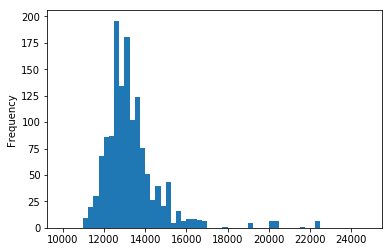

In [159]:
df.income.plot.hist(bins=np.arange(10000, 25000, 250))

> Yep that seems fine. 

In [160]:
df.province.value_counts()

Zuid-Holland     240
Noord-Brabant    226
Gelderland       206
Noord-Holland    175
Limburg          108
Overijssel       103
Utrecht           97
Groningen         71
Friesland         68
Zeeland           49
Drenthe           41
Flevoland         25
geen               3
Name: province, dtype: int64

> "geen" is suspicious. In addition, there is not a lot of schools in Drenthe and Flevoland. 

* Plot income and density versus grade. Do you see any apparent influence?
* Investigate the outliers that you see. You don't have to solve these. 

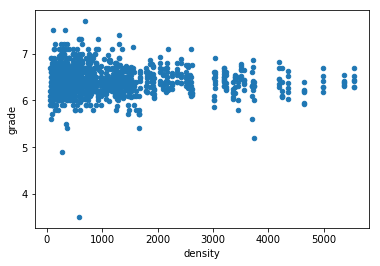

In [161]:
df.plot.scatter(x = "density", y = "grade")

> Not very clear. 

In [105]:
df.assign(
    log_density = np.log(df.density)
).plot.scatter(x = "log_density", y = "grade")

> Yep I think this could be a quadratic influence of log(density).

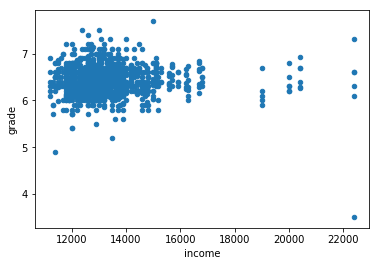

In [121]:
df.plot.scatter(x = "income", y = "grade")

df.assign(
    log_income = np.log(df.income)
).plot.scatter(x = "log_income", y = "grade")

> I don't see any influence.

In [123]:
df.sort_values("grade").head(10)

municipality       province  inhabitants  \
BLOEMENDAAL                        Bloemendaal  Noord-Holland        22940   
ACHTKARSPELEN                    Achtkarspelen      Friesland        27916   
MAASSLUIS                            Maassluis   Zuid-Holland        32470   
BRUNSSUM                              Brunssum        Limburg        28289   
VEENDAM                                Veendam      Groningen        27519   
KAPELLE                                Kapelle        Zeeland        12649   
WESTERVELD                          Westerveld        Drenthe        19069   
KRIMPEN AAN DEN IJSSEL  Krimpen aan den IJssel   Zuid-Holland        29079   
BRUNSSUM                              Brunssum        Limburg        28289   
STEDE BROEC                        Stede Broec  Noord-Holland        21656   

                          area  density   income                 capital  \
BLOEMENDAAL              37.93    584.8  22400.0                Overveen   
ACHTKARSPELEN           102.61    272.7  11400.0              Buitenpost   
MAASSLUIS                 8.60   3744.0  13500.0               Maassluis   
BRUNSSUM                 17.17   1664.4  12000.0                Brunssum   
VEENDAM                  76.24    361.7  12000.0                 Veendam   
KAPELLE                  37.14    338.6  12900.0                 Kapelle   
WESTERVELD              278.99     68.2  13600.0                  Diever   
KRIMPEN AAN DEN IJSSEL    7.83   3694.8  13900.0  Krimpen aan den IJssel   
BRUNSSUM                 17.17   1664.4  12000.0                Brunssum   
STEDE BROEC              14.77   1456.6  12600.0            Bovenkarspel   

                                                           biggest_places  \
BLOEMENDAAL                              Aerdenhout, Bennebroek, Overveen   
ACHTKARSPELEN           Surhuisterveen, Harkema, Kootstertille, Twijze...   
MAASSLUIS                                                       Maassluis   
BRUNSSUM                                                         Brunssum   
VEENDAM                                               Veendam, Wildervank   
KAPELLE                                   Biezelinge, Kapelle, Wemeldinge   
WESTERVELD                                     Diever, Dwingeloo, Havelte   
KRIMPEN AAN DEN IJSSEL                             Krimpen aan den IJssel   
BRUNSSUM                                                         Brunssum   
STEDE BROEC                         Bovenkarspel, Grootebroek, Lutjebroek   

                                                                  profile  \
BLOEMENDAAL             Economie en Maatschappij / Cultuur en Maatscha...   
ACHTKARSPELEN           Economie en Maatschappij / Cultuur en Maatscha...   
MAASSLUIS                                         Cultuur en Maatschappij   
BRUNSSUM                        Natuur en Techniek / Natuur en Gezondheid   
VEENDAM                 Economie en Maatschappij / Cultuur en Maatscha...   
KAPELLE                                           Cultuur en Maatschappij   
WESTERVELD              Economie en Maatschappij / Cultuur en Maatscha...   
KRIMPEN AAN DEN IJSSEL                                 Natuur en Techniek   
BRUNSSUM                                               Natuur en Techniek   
STEDE BROEC                                       Cultuur en Maatschappij   

                        grade  
BLOEMENDAAL               3.5  
ACHTKARSPELEN             4.9  
MAASSLUIS                 5.2  
BRUNSSUM                  5.4  
VEENDAM                   5.4  
KAPELLE                   5.5  
WESTERVELD                5.6  
KRIMPEN AAN DEN IJSSEL    5.6  
BRUNSSUM                  5.7  
STEDE BROEC               5.7

> Allright the combined profiles make sense, those are probably very small, noisy categories. Brunssum is looking pretty bad as well. 

* Regress the average grade on density and income. Interpret what you see.
* Add quadratic terms.
* Use the formula `grade ~ income + province + density`. Some rows have "geen" listed as province, remove those. Why do all provinces have a positive influence on the grade?

In [108]:
import statsmodels.formula.api as smf

In [109]:
results = smf.ols('grade ~ income + density', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.486
Date:                Tue, 01 Aug 2017   Prob (F-statistic):             0.0309
Time:                        12:00:13   Log-Likelihood:                -267.40
No. Observations:                1206   AIC:                             540.8
Df Residuals:                    1203   BIC:                             556.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4654      0.081     79.890      0.000       6.307       6.624
income     -1.131e-06   6.09e-06     -0.186      0.853   -1.31e-05    1.08e-05
density    -2.029e-05   7.84e-06     -2.587      0.010   -3.57e-05    -4.9e-06
==============================================================================
Omnibus:                      273.495   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3431.894
Skew:                          -0.673   Prob(JB):                         0.00
Kurtosis:                      11.154   Cond. No.                     1.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [164]:
results = smf.ols('grade ~ income + I(income**2) + density + I(density**2)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     5.446
Date:                Tue, 01 Aug 2017   Prob (F-statistic):           0.000240
Time:                        13:20:26   Log-Likelihood:                -260.04
No. Observations:                1206   AIC:                             530.1
Df Residuals:                    1201   BIC:                             555.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.9443      0.404     12.227      0.000       4.151       5.738
income              0.0002   5.37e-05      3.791      0.000    9.82e-05       0.000
I(income ** 2)  -6.648e-09   1.73e-09     -3.838      0.000      -1e-08   -3.25e-09
density         -3.608e-05   2.38e-05     -1.515      0.130   -8.28e-05    1.06e-05
I(density ** 2)  1.874e-09   5.28e-09      0.355      0.723   -8.48e-09    1.22e-08
==============================================================================
Omnibus:                      196.075   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1801.803
Skew:                          -0.448   Prob(JB):                         0.00
Kurtosis:                       8.921   Cond. No.                     8.63e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.63e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> There is a very slight quadratic influence in income. Apparently outliers in both directions perform worse. 

In [163]:
results = smf.ols('grade ~ income + I(income**2) + np.log(density) + I(np.log(density)**2)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     7.109
Date:                Tue, 01 Aug 2017   Prob (F-statistic):           1.18e-05
Time:                        13:20:17   Log-Likelihood:                -256.77
No. Observations:                1206   AIC:                             523.5
Df Residuals:                    1201   BIC:                             549.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.1096      0.488      8.421      0.000       3.152       5.067
income                      0.0002   5.39e-05      3.546      0.000    8.55e-05       0.000
I(income ** 2)          -6.278e-09   1.74e-09     -3.613      0.000   -9.69e-09   -2.87e-09
np.log(density)             0.3076      0.093      3.305      0.001       0.125       0.490
I(np.log(density) ** 2)    -0.0254      0.007     -3.563      0.000      -0.039      -0.011
==============================================================================
Omnibus:                      203.279   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1930.799
Skew:                          -0.469   Prob(JB):                         0.00
Kurtosis:                       9.127   Cond. No.                     1.05e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
results = smf.ols('grade ~ income + province + density', data=df[df.province != "geen"]).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.763
Date:                Tue, 01 Aug 2017   Prob (F-statistic):           0.000695
Time:                        12:02:24   Log-Likelihood:                -252.98
No. Observations:                1206   AIC:                             534.0
Df Residuals:                    1192   BIC:                             605.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     6.3820      0.105     61.019      0.000       6.177       6.587
province[T.Flevoland]         0.1536      0.081      1.906      0.057      -0.004       0.312
province[T.Friesland]         0.0645      0.065      0.985      0.325      -0.064       0.193
province[T.Gelderland]        0.1157      0.056      2.082      0.038       0.007       0.225
province[T.Groningen]         0.0170      0.065      0.259      0.795      -0.111       0.145
province[T.Limburg]           0.0799      0.061      1.319      0.187      -0.039       0.199
province[T.Noord-Brabant]     0.1728      0.056      3.112      0.002       0.064       0.282
province[T.Noord-Holland]     0.0632      0.060      1.050      0.294      -0.055       0.181
province[T.Overijssel]        0.1022      0.059      1.718      0.086      -0.015       0.219
province[T.Utrecht]           0.1480      0.063      2.348      0.019       0.024       0.272
province[T.Zeeland]           0.1822      0.068      2.674      0.008       0.049       0.316
province[T.Zuid-Holland]      0.0860      0.060      1.446      0.148      -0.031       0.203
income                    -3.327e-06   7.26e-06     -0.458      0.647   -1.76e-05    1.09e-05
density                   -1.387e-05   9.74e-06     -1.424      0.155    -3.3e-05    5.24e-06
==============================================================================
Omnibus:                      258.687   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3171.054
Skew:                          -0.620   Prob(JB):                         0.00
Kurtosis:                      10.847   Cond. No.                     2.80e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> These coefficients are positive because the encoding scheme leaves out the coefficient for Drenthe, which is apparently the province with the lowest average grade. Income is no longer significant, it interacts with province probably. 

* Remove income and density from the regression, but add an interaction between province and profile. Do you see any interesting interactions? How do you interpret these?

In [113]:
results = smf.ols('grade ~ province * profile', data=df[df.province != "geen"]).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     6.693
Date:                Tue, 01 Aug 2017   Prob (F-statistic):           3.43e-51
Time:                        12:03:10   Log-Likelihood:                -52.687
No. Observations:                1235   AIC:                             257.4
Df Residuals:                    1159   BIC:                             646.4
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                   6.2907      0.106     59.114      0.000       6.082       6.499
province[T.Flevoland]                                                                       0.0298      0.168      0.177      0.860      -0.300       0.360
province[T.Friesland]                                                                       0.0529      0.137      0.385      0.700      -0.217       0.322
province[T.Gelderland]                                                                     -0.0047      0.116     -0.040      0.968      -0.232       0.223
province[T.Groningen]                                                                      -0.1997      0.135     -1.484      0.138      -0.464       0.064
province[T.Limburg]                                                                         0.0024      0.125      0.019      0.985      -0.242       0.247
province[T.Noord-Brabant]                                                                   0.0506      0.116      0.436      0.663      -0.177       0.278
province[T.Noord-Holland]                                                                  -0.0574      0.118     -0.486      0.627      -0.289       0.174
province[T.Overijssel]                                                                      0.0221      0.125      0.177      0.859      -0.223       0.267
province[T.Utrecht]                                                                         0.0431      0.126      0.342      0.732      -0.204       0.290
province[T.Zeeland]                                                                         0.0255      0.141      0.181      0.856      -0.251       0.302
province[T.Zuid-Holland]                                                                   -0.0567      0.115     -0.494      0.621      -0.282       0.168
profile[T.Economie en Maatschappij]                                                         0.0560      0.150      0.372      0.710      -0.239       0.351
profile[T.Economie en Maatschappij / Cultuur en Maatschappij]                              -0.0650      0.150     -0.432      0.666      -0.360       0.230
profile[T.Natuur en Gezondheid]                                                            -0.0860      0.150     -0.571      0.568      -0.381       0.209
profile[T.Natuur en Gezondheid / Economie en Maatschappij]                                  0.5815      0.106      5.467      0.000       0.373       0.790
profile[T.Natuur en Techniek]                                                               0.2707      0.158      1.71

> There is really nothing going on here. Some very small categories, the mixed profiles, show some noise. It is interesting and worrying that the coefficients of the provinces also disappear here with the interaction. 

* Explain the problem with treating a 6.5 in a small municipality the same as a 6.5 in a large municipality. How would you solve this?
* What other problems do you see before you are willing to draw conclusions on this dataset?

> The 6.5 in a small municipality has more uncertainty. Really, the rows should be students. But we don't have that data. A hacky way to solve this is to generate rows for each student, with the average grade as an approximation. There are also better ways to solve this with generalized linear models, using `pymc3` for example!  

> In general, I would recommend combining with a more theoretical approach. 